Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5,
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library
to create visualizations that effectively represent the AQI trends and patterns for different
pollutants in the city.
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels,
and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

# Load the dataset
data = pd.read_csv("PNQ_AQI.csv")

In [ ]:
#expore structure and content
data.head()
data.info()
data.describe()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        7844 non-null   object 
 1   SO2 µg/m3   7844 non-null   object 
 2   Nox µg/m3   7844 non-null   object 
 3   RSPM µg/m3  7843 non-null   float64
 4   SPM         2970 non-null   float64
 5   CO2 µg/m3   0 non-null      float64
 6   AQI         7787 non-null   float64
 7   Location    7844 non-null   object 
dtypes: float64(4), object(4)
memory usage: 490.4+ KB


,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR
...,...,...,...,...,...,...,...,...
7839,18-01-2019,41,100,134.0,300.0,NaN,123.0,MPCB-SWGT
7840,19-01-2019,50,132,172.0,446.0,NaN,152.0,MPCB-SWGT
7841,23-01-2019,47,138,210.0,558.0,NaN,173.0,MPCB-SWGT
7842,2019-02-02 00:00:00,29,88,82.0,259.0,NaN,108.0,MPCB-SWGT


In [ ]:
data.columns = data.columns.str.replace(' µg/m3', '')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'], inplace=True, ignore_index=True)

<ipython-input-5-7da07f01f1fc>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
for _, col in enumerate(list(data.columns[1:3])):
    data[f'{col} BDL'] = data[f'{col}'].map(lambda x: 1 if 'BDL' in x else 0)
    data[f'{col}'] = data[f'{col}'].apply(lambda x: x[-3:])
    data[f'{col}'] = data[f'{col}'].apply(lambda x: 0 if 'NA' in x else int((re.findall(r'\d+',x))[0]))

outlier_features = list(data.columns[1:5])
def detect_outliers(df,n,features):
    outlier_indices = []

    for col in features:
        q1 = np.nanpercentile(df[col], 25)
        q3 = np.nanpercentile(df[col], 75)
        iqr = q3 - q1
        outlier_step = 1.5 * iqr
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

Outliers_to_drop = detect_outliers(data,1,outlier_features)
data.loc[Outliers_to_drop]

data.drop(Outliers_to_drop, axis = 0, inplace=True)

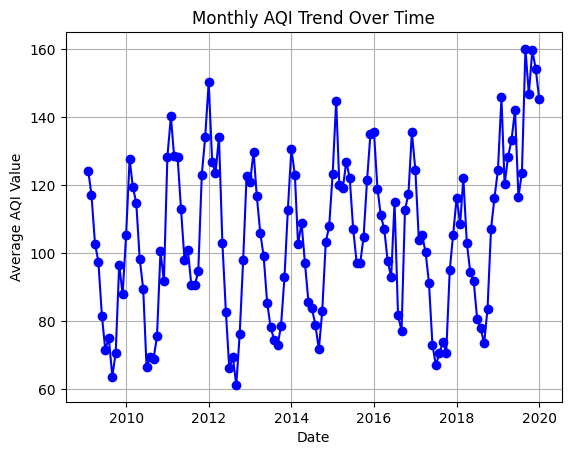

In [ ]:
monthly_aqi = data.resample('M', on='Date')['AQI'].mean()

# Create a line plot for AQI vs. month
plt.plot(monthly_aqi.index, monthly_aqi.values, color='b', marker='o', label='AQI (Monthly Average)')
plt.title('Monthly AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.grid(True)
plt.show()

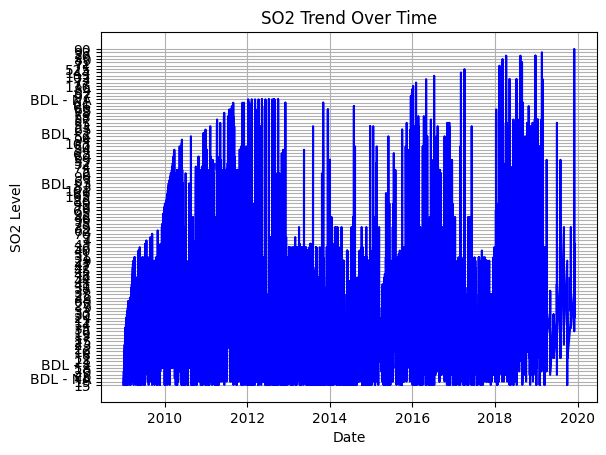

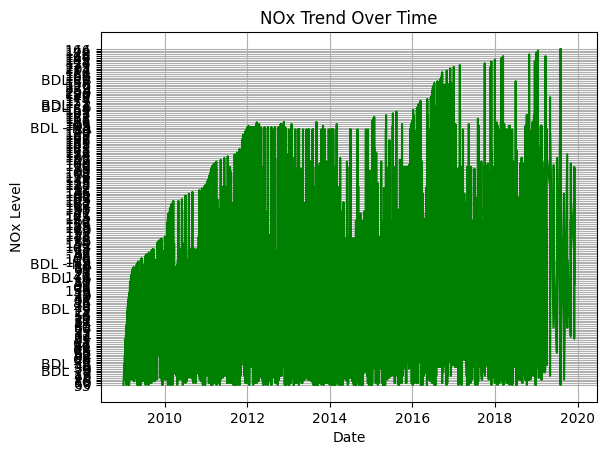

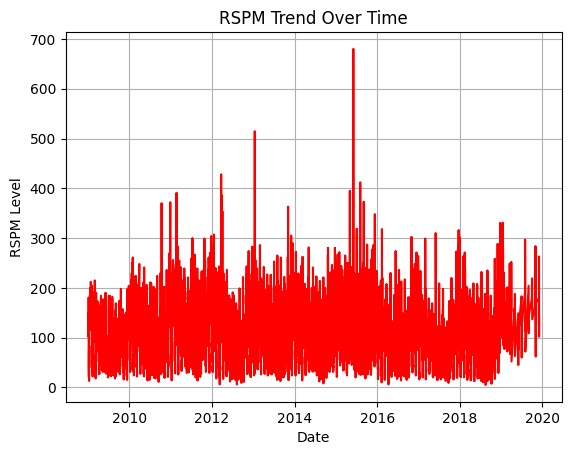

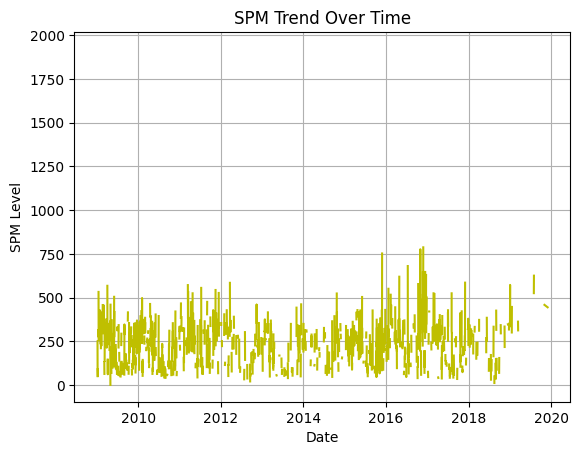

In [ ]:
# Create separate line plots for each pollutant
# PM2.5
plt.plot(data['Date'], data['SO2'], label='SO2', color='b')
plt.title('SO2 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('SO2 Level')
plt.grid(True)
plt.show()

# PM10
plt.plot(data['Date'], data['Nox'], label='NOx', color='g')
plt.title('NOx Trend Over Time')
plt.xlabel('Date')
plt.ylabel('NOx Level')
plt.grid(True)
plt.show()

# CO
plt.plot(data['Date'], data['RSPM'], label='RSPM', color='r')
plt.title('RSPM Trend Over Time')
plt.xlabel('Date')
plt.ylabel('RSPM Level')
plt.grid(True)
plt.show()

# SPM
plt.plot(data['Date'], data['SPM'], label='SPM', color='y')
plt.title('SPM Trend Over Time')
plt.xlabel('Date')
plt.ylabel('SPM Level')
plt.grid(True)
plt.show()

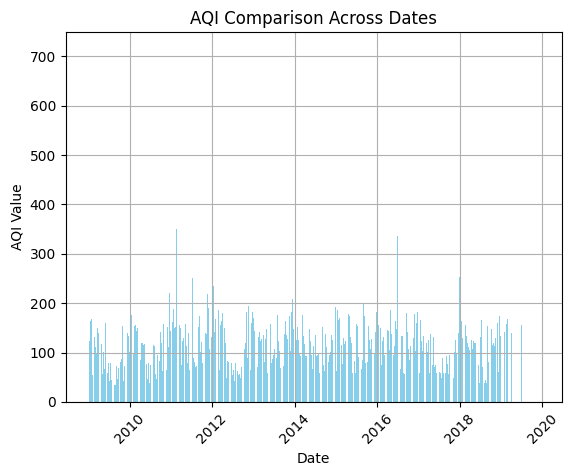

In [ ]:
# Create a bar plot to compare AQI values across different dates
plt.bar(data['Date'], data['AQI'], color='skyblue')
plt.title('AQI Comparison Across Dates')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


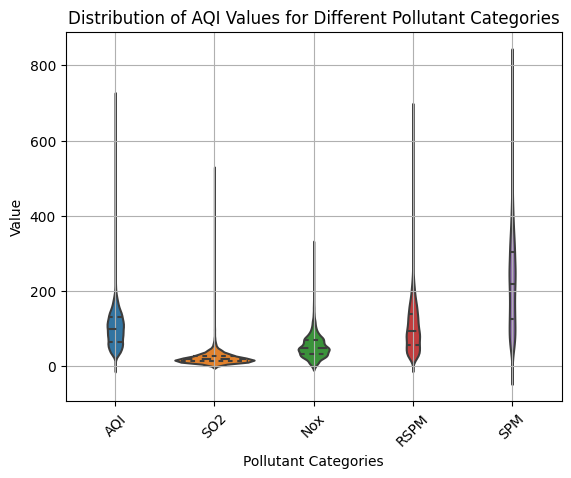

In [ ]:
# Create a violin plot for AQI values for different pollutant categories
sns.violinplot(x='variable', y='value', data=data[['AQI', 'SO2', 'Nox', 'RSPM', 'SPM']].melt(), inner='quart')
plt.title('Distribution of AQI Values for Different Pollutant Categories')
plt.xlabel('Pollutant Categories')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


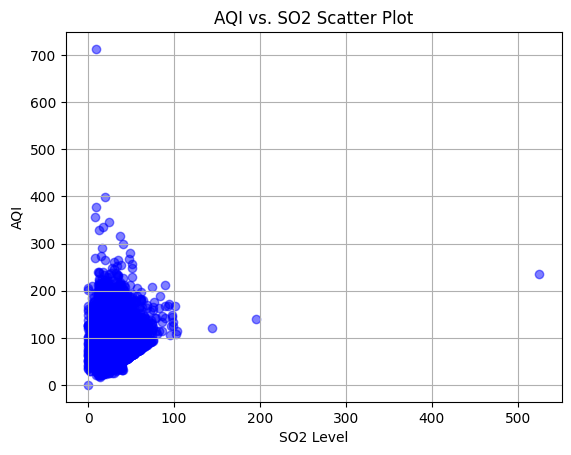

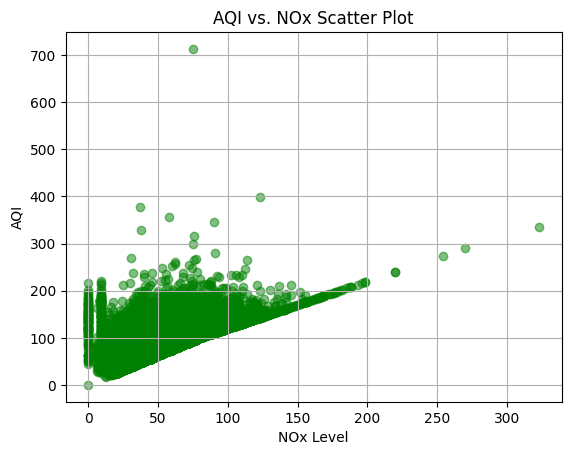

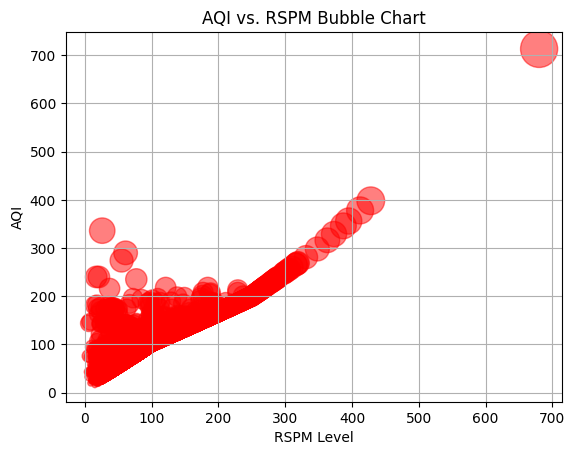

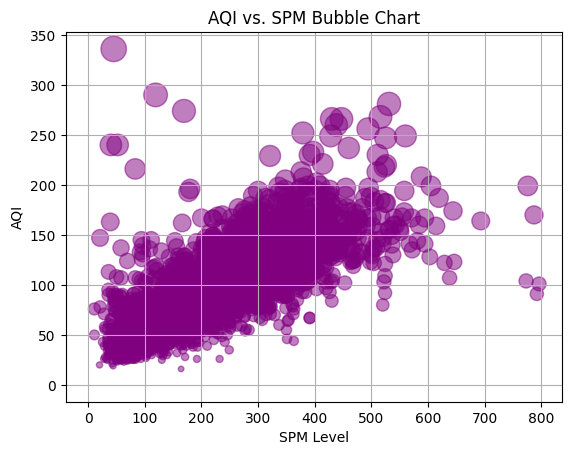

In [ ]:
# Scatter plot of AQI vs. SO2
plt.scatter(data['SO2'], data['AQI'], alpha=0.5, color='blue')
plt.title('AQI vs. SO2 Scatter Plot')
plt.xlabel('SO2 Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Scatter plot of AQI vs. NOx
plt.scatter(data['Nox'], data['AQI'], alpha=0.5, color='green')
plt.title('AQI vs. NOx Scatter Plot')
plt.xlabel('NOx Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Bubble chart of AQI vs. RSPM
plt.scatter(data['RSPM'], data['AQI'], s=data['AQI'], alpha=0.5, color='red')
plt.title('AQI vs. RSPM Bubble Chart')
plt.xlabel('RSPM Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Bubble chart of AQI vs. SPM
plt.scatter(data['SPM'], data['AQI'], s=data['AQI'], alpha=0.5, color='purple')
plt.title('AQI vs. SPM Bubble Chart')
plt.xlabel('SPM Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()
